In [20]:
from tensorflow.keras.datasets import mnist

# Load the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Check shapes
print("Train:", x_train.shape, y_train.shape)
print("Test:", x_test.shape, y_test.shape)


Train: (60000, 28, 28) (60000,)
Test: (10000, 28, 28) (10000,)


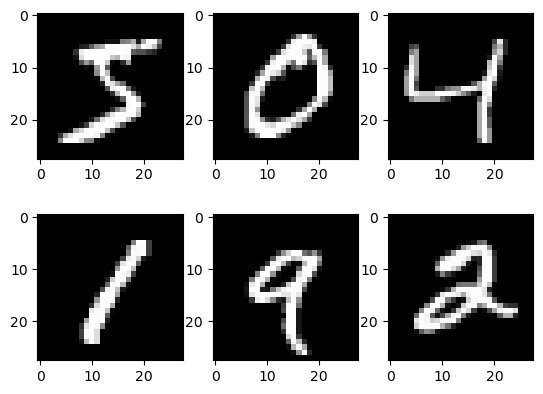

In [21]:
import matplotlib.pyplot as plt 

def show_img( img , label = None ):
    plt.imshow(img , cmap= 'gray')  # MNIST is grayscale 
    if label is not None :
        plt.title(f"Label is {label}")
    plt.axis('off')
    plt.show()

for i in range(6):
    plt.subplot(2 , 3 , i + 1)
    plt.imshow(x_train[i] , cmap='gray')

In [25]:
print(f"Before reshape : {x_train.shape}")
x_train_flattended = x_train.reshape(-1 ,28*28 )
x_test_flatended = x_test.reshape(-1 , 28*28)
print(f"After reshaped : {x_train_flattended.shape}")

Before reshape : (60000, 28, 28)
After reshaped : (60000, 784)


### 3. Preprocess Data ( Standardization )

In [26]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()   # mean = 0 , std = 1 

x_train_scaled = scaler.fit_transform(x_train_flattended)
x_test_scaled = scaler.transform(x_test_flatended)

### 4. Apply PCA 

In [27]:
pca = PCA(n_components= 2)

x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

Explained Variance Ratio: [0.05646717 0.04078272]


### 5. Visualize the result 

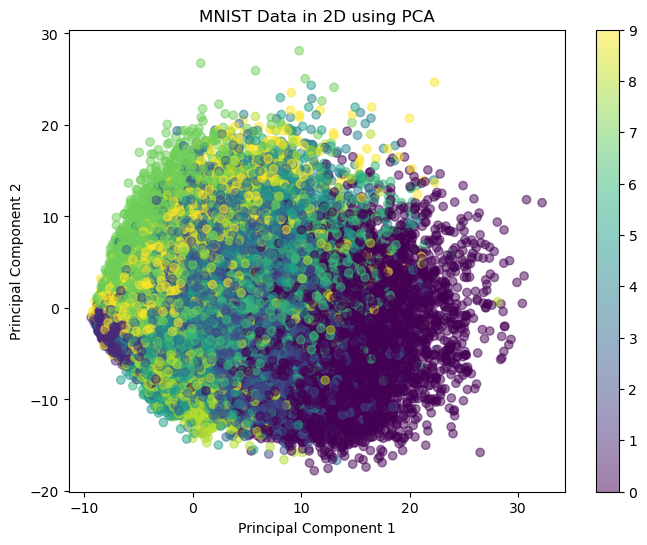

In [28]:
# Plotting the first two PCA components
plt.figure(figsize=(8, 6))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.colorbar()  # Show color bar for different digits
plt.title("MNIST Data in 2D using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


## 1. K - mean 

In [29]:
from sklearn.cluster import KMeans 
# Apply K-means clustering (K=10 for MNIST digits)
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(x_train_scaled)

# Get the predicted cluster labels
y_kmeans = kmeans.labels_


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


###  Calculate the Silhouette Score


In [31]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
sil_score = silhouette_score(x_train_scaled, y_kmeans)
print(f"Silhouette Score: {sil_score}")


Silhouette Score: 0.007007388378449965


## 2. HDBSCAN

In [32]:
!pip install hdbscan


In [34]:
import hdbscan

# Create and fit HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=30)
cluster_labels = clusterer.fit_predict(x_train_scaled)

# Check how many clusters were found (excluding -1 which is noise)
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print(f"Estimated number of clusters: {n_clusters}")


Estimated number of clusters: 5


###  Calculate the Silhouette Score


In [36]:
from sklearn.metrics import silhouette_score

# Filter noise points (label -1) if needed
mask = cluster_labels != -1
score = silhouette_score(x_train_scaled[mask], cluster_labels[mask])
print(f"Silhouette Score: {score:.3f}")


Silhouette Score: 0.219
